In [1]:
import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

In [2]:
def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

In [8]:
class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2=None
    
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

In [23]:
def train(Y,X,model, optimizer, criterion, n, epochs = 1000):
    cost = []
    total = 0
    for epoch in range(epochs):
        total = 0
        for y,x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            total += loss.item()
        cost.append(total)
        if epoch % n == 0:
            PlotStuff(X,Y,model,epoch,leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost
        

In [14]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0
print(Y)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])


In [15]:
# cross entropy loss function
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

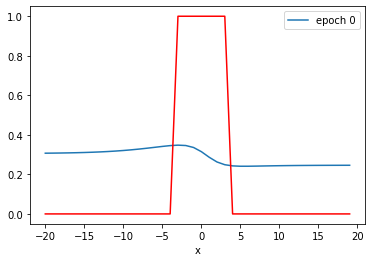

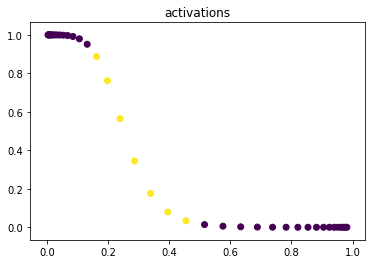

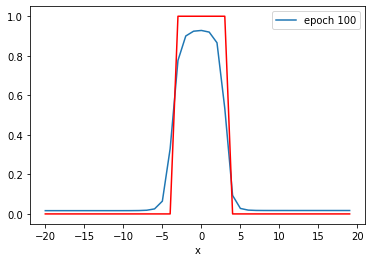

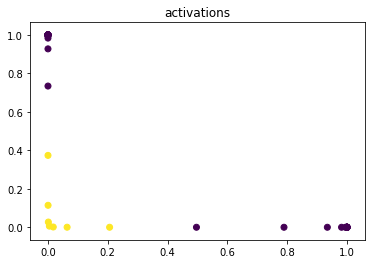

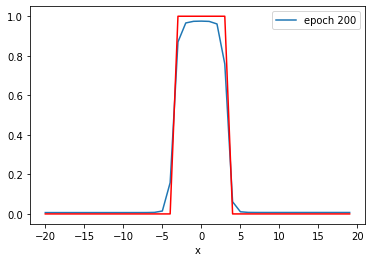

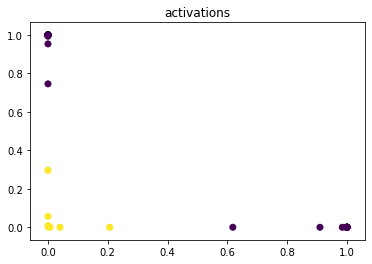

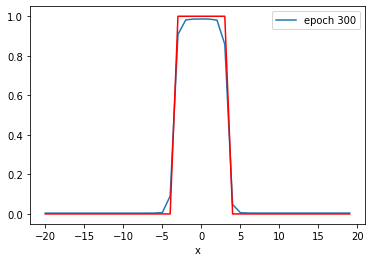

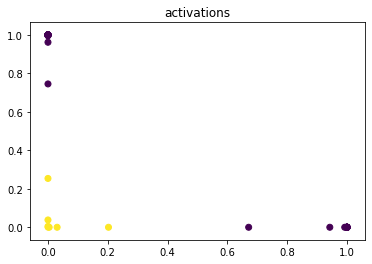

Text(0.5, 1.0, 'cross entropy loss')

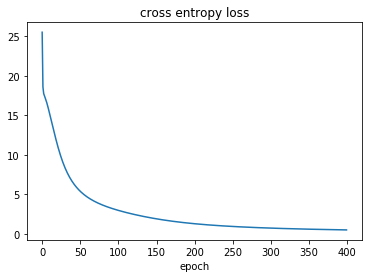

In [24]:
D_in = 1
H = 2
D_out = 1
learning_rate = 0.1
model = Net(D_in, H, D_out)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
cost_cross = train(Y,X,model,optimizer, criterion_cross,100, epochs = 400)
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')


In [18]:
x=torch.tensor([0.0])
yhat=model(x)
yhat

tensor([0.9980], grad_fn=<SigmoidBackward>)

In [26]:
X_=torch.tensor([[-7.0],[0.0],[2.0],[3.0],[7.0]])
Yhat=model(X_)
Yhat

tensor([[0.0029],
        [0.9934],
        [0.9903],
        [0.9014],
        [0.0048]], grad_fn=<SigmoidBackward>)

In [27]:
Yhat=Yhat>0.5
Yhat

tensor([[False],
        [ True],
        [ True],
        [ True],
        [False]])

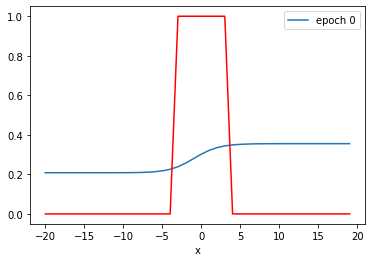

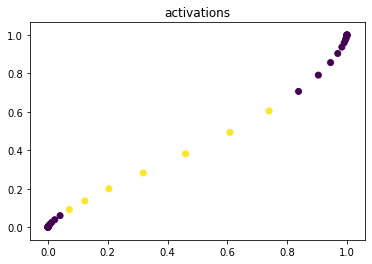

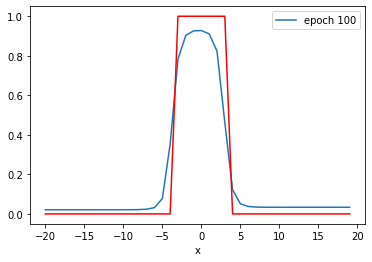

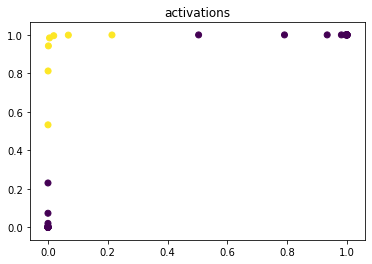

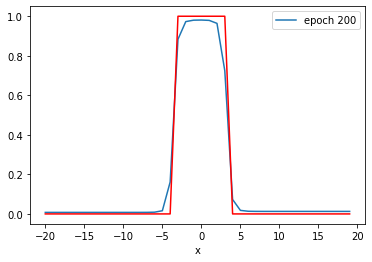

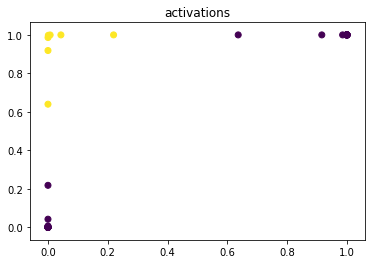

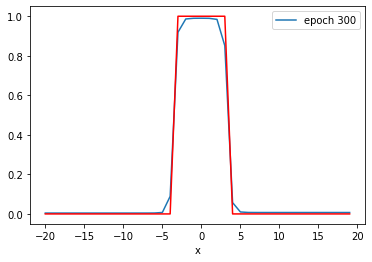

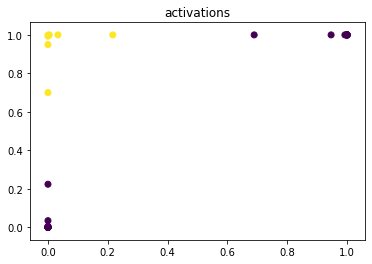

Text(0.5, 1.0, 'cross entropy loss')

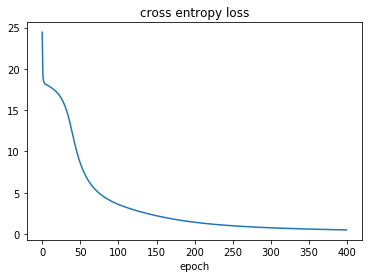

In [25]:
criterion = nn.MSELoss()
model = Net(D_in, H, D_out)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
cost_cross = train(Y,X,model,optimizer, criterion_cross,100, epochs = 400)
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')


        

### More Hidden Neuron

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [29]:
def get_hist(model,data_set):
    activations=model.activation(data_set.x)
    for i,activation in enumerate(activations):
        plt.hist(activation.numpy(),4,density=True)
        plt.title("Activation layer " + str(i+1))
        plt.xlabel("Activation")
        plt.xlabel("Activation")
        plt.legend()
        plt.show()

In [30]:
def PlotStuff(X,Y,model=None,leg=False):
    
    plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0 ' )
    plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1 ' )

    if model!=None:
        plt.plot(X.numpy(),model(X).detach().numpy(),label='neral network ')

    plt.legend()
    plt.show()

In [4]:
class Data(Dataset):
    def __init__(self):
        self.x=torch.linspace(-20, 20, 100).view(-1,1)
  
        self.y=torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]>-10)& (self.x[:,0]<-5)]=1
        self.y[(self.x[:,0]>5)& (self.x[:,0]<10)]=1
        self.y=self.y.view(-1,1)
        self.len=self.x.shape[0]
    def __getitem__(self,index):    
            
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len


In [5]:
data_set = Data()
data_set.x

tensor([[-20.0000],
        [-19.5960],
        [-19.1919],
        [-18.7879],
        [-18.3838],
        [-17.9798],
        [-17.5758],
        [-17.1717],
        [-16.7677],
        [-16.3636],
        [-15.9596],
        [-15.5556],
        [-15.1515],
        [-14.7475],
        [-14.3434],
        [-13.9394],
        [-13.5354],
        [-13.1313],
        [-12.7273],
        [-12.3232],
        [-11.9192],
        [-11.5152],
        [-11.1111],
        [-10.7071],
        [-10.3030],
        [ -9.8990],
        [ -9.4949],
        [ -9.0909],
        [ -8.6869],
        [ -8.2828],
        [ -7.8788],
        [ -7.4747],
        [ -7.0707],
        [ -6.6667],
        [ -6.2626],
        [ -5.8586],
        [ -5.4545],
        [ -5.0505],
        [ -4.6465],
        [ -4.2424],
        [ -3.8384],
        [ -3.4343],
        [ -3.0303],
        [ -2.6263],
        [ -2.2222],
        [ -1.8182],
        [ -1.4141],
        [ -1.0101],
        [ -0.6061],
        [ -0.2020],


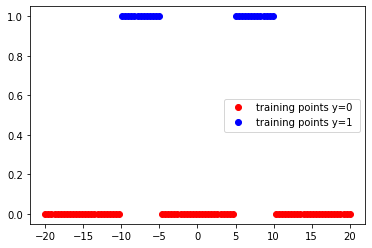

In [38]:
PlotStuff(data_set.x,data_set.y,leg=False)

In [40]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=torch.sigmoid(self.linear2(x))
        return x

In [41]:
 def train(data_set,model,criterion, train_loader, optimizer, epochs=5,plot_number=10):
    cost=[]
    
    for epoch in range(epochs):
        total=0
        
        for x,y in train_loader:
            optimizer.zero_grad()
            
            yhat=model(x)
            loss=criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total+=loss.item()
            
        if epoch%plot_number==0:
            PlotStuff(data_set.x,data_set.y,model)
        
        cost.append(total)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

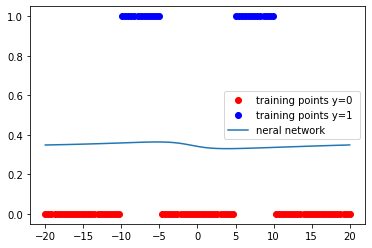

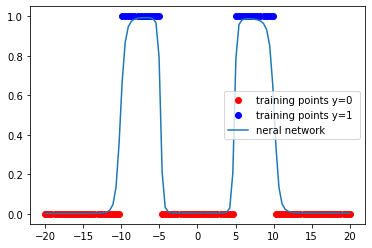

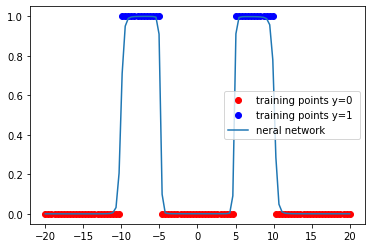

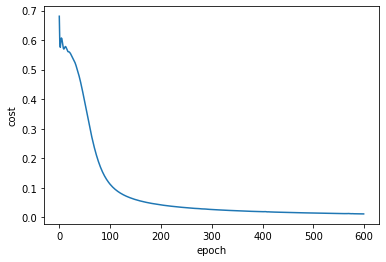

In [42]:
torch.manual_seed(0)
model=Net(1,9,1)
learning_rate=0.1
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set,batch_size=100)
COST=train(data_set,model,criterion, train_loader, optimizer, epochs=600,plot_number=200)

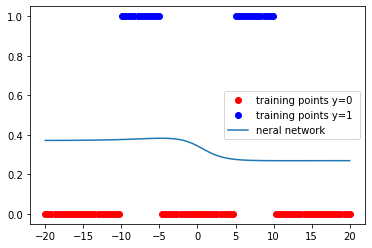

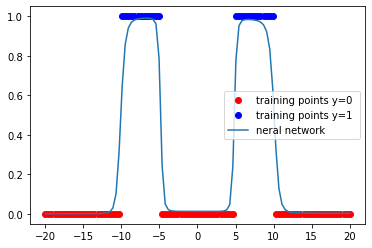

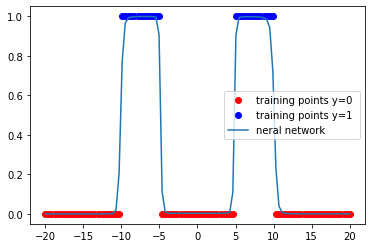

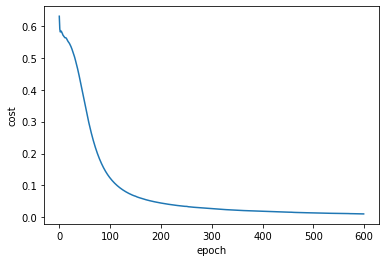

In [50]:
model1= torch.nn.Sequential(
    torch.nn.Linear(1, 6), 
    torch.nn.Sigmoid(),
    torch.nn.Linear(6,1),
    torch.nn.Sigmoid())
learning_rate=0.1
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model1.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set,batch_size=100)
COST=train(data_set,model1,criterion, train_loader, optimizer, epochs=600,plot_number=200)